# Importing Libraries And Datasets

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [58]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [59]:
# Scaling all the images to the same size
img_width = 180
img_height = 180

In [60]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [61]:
data_category = data_train.class_names

In [189]:
data_category

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [62]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [63]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


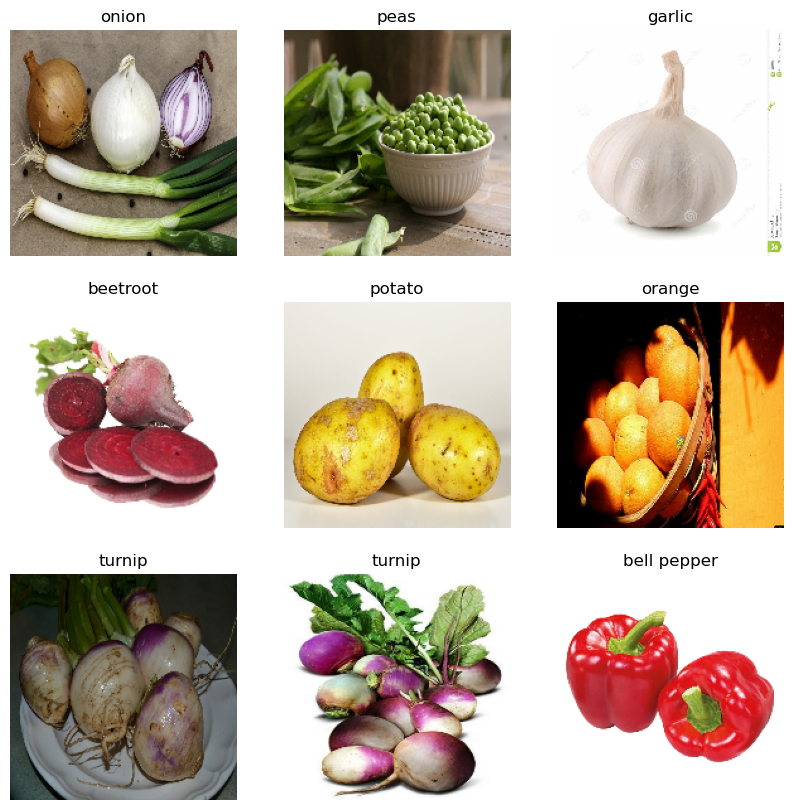

In [64]:
# Printing imgs from train dataset
plt.figure(figsize=(10,10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i].numpy()])
        plt.axis('off')
plt.show()

# Model Building
- CNN Model

In [65]:
from tensorflow.keras.models import Sequential

In [66]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [67]:
# All the images will be saved in RGB format.
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(len(data_category))
])

## Compile the model

In [68]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [69]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 270ms/step - accuracy: 0.0666 - loss: 3.4663 - val_accuracy: 0.3362 - val_loss: 2.2824
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 258ms/step - accuracy: 0.2979 - loss: 2.4251 - val_accuracy: 0.6410 - val_loss: 1.4402
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.4853 - loss: 1.7939 - val_accuracy: 0.8063 - val_loss: 0.7926
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.6567 - loss: 1.2002 - val_accuracy: 0.9060 - val_loss: 0.4350
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.8391 - loss: 0.5810 - val_accuracy: 0.9402 - val_loss: 0.3668
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.9335 - loss: 0.2643 - val_accuracy: 0.9459 - val_loss: 0.2963
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 277ms/step - accuracy: 0.9640 - loss: 0.1667 - val_accuracy: 0.9259 - val_loss: 0.4277
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - accuracy: 0.9708 - loss: 0.1334 - val_accu

## Evaluate the model

In [81]:
loss, accuracy = model.evaluate(data_val)
print(f'Accuracy: {accuracy}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.9481 - loss: 0.3610
Accuracy: 0.9658119678497314


## Plotting the training history.

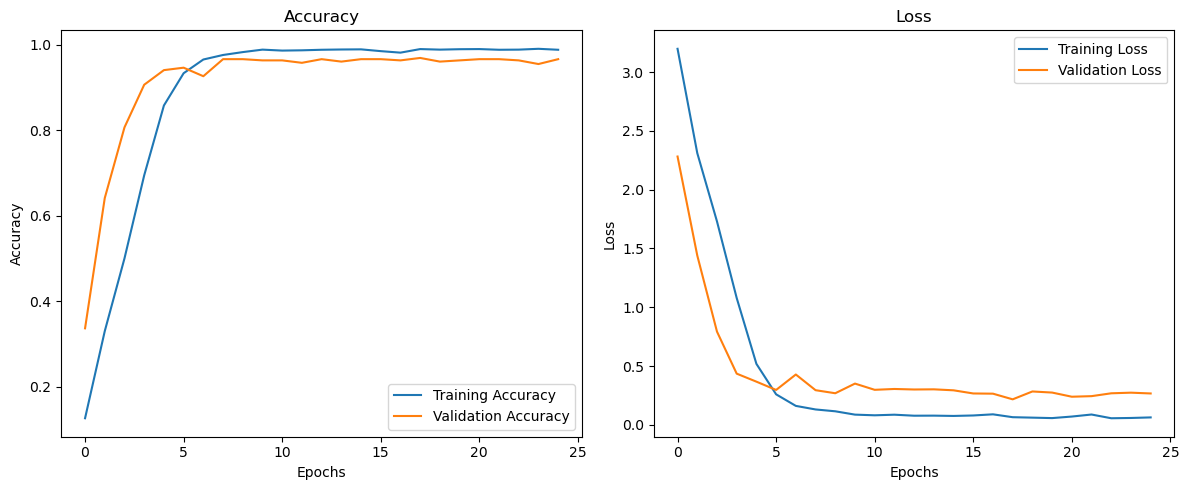

In [71]:
# Plot graphs.
import matplotlib.pyplot as plt

# Define the range of epochs
epochs_range = range(epochs_size)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

In [181]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)

In [182]:
pred = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [183]:
score = tf.nn.softmax(pred)

In [192]:
print('Vegetable/Fruit in image is {} with accuracy of {:.2f}'.format(data_category[np.argmax(score)], np.max(score) * 100))


Vegetable/Fruit in image is apple with accuracy of 99.91


In [193]:
model.save('Image_classify_keras.keras')